In [9]:
import numpy as np
import rasterio
from rasterio.plot import show

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow import keras

In [2]:
pixeles = []
etiquetas = []

In [3]:
directorio_coberturas = r"C:\Users\jsuarez\Downloads\ImagenesDeepLearning\Entrenamiento"

In [4]:
for cobertura in range(1, 4):
    carpeta = directorio_coberturas + '\\Cobertura_' + str(cobertura)
    for muestra in range(1, 8):
        archivo = carpeta + '\\muestra' + str(muestra) + '.tif'
        with rasterio.open(archivo) as muestra_entrenamiento:
            imagen = muestra_entrenamiento.read()
            imagen = imagen.reshape((imagen.shape[0], -1)).T
            pixeles.extend(imagen)
            etiquetas.extend([cobertura] * imagen.shape[0])

In [5]:
pixeles = np.array(pixeles)
etiquetas = np.array(etiquetas)

In [6]:
pixeles_entrenamiento, pixeles_test, etiquetas_entrenamiento, etiquetas_test = train_test_split(pixeles, etiquetas, test_size = 0.20)

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(pixeles_entrenamiento)
pixeles_entrenamiento = scaler.transform(pixeles_entrenamiento)
pixeles_test = scaler.transform(pixeles_test)

In [11]:
lb = LabelBinarizer()
etiquetas_entrenamiento = lb.fit_transform(etiquetas_entrenamiento)
etiquetas_test = lb.fit_transform(etiquetas_test)

In [12]:
modelo = keras.Sequential([
    keras.layers.Input(shape=(7, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])

In [13]:
modelo.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
modelo.fit(pixeles_entrenamiento, etiquetas_entrenamiento, epochs=10, batch_size=32)

Epoch 1/10
26/26 [==============================] - 1s 1ms/step - loss: 1.1041 - accuracy: 0.3815
Epoch 2/10
26/26 [==============================] - 0s 849us/step - loss: 0.7576 - accuracy: 0.8117
Epoch 3/10
26/26 [==============================] - 0s 877us/step - loss: 0.5225 - accuracy: 0.8773
Epoch 4/10
26/26 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.9162
Epoch 5/10
26/26 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.9502
Epoch 6/10
26/26 [==============================] - 0s 892us/step - loss: 0.2432 - accuracy: 0.9648
Epoch 7/10
26/26 [==============================] - 0s 899us/step - loss: 0.2052 - accuracy: 0.9708
Epoch 8/10
26/26 [==============================] - 0s 831us/step - loss: 0.1864 - accuracy: 0.9660
Epoch 9/10
26/26 [==============================] - 0s 837us/step - loss: 0.1535 - accuracy: 0.9611
Epoch 10/10
26/26 [==============================] - 0s 797us/step - loss: 0.1409 - accuracy: 0.9733


In [15]:
directorio_imagen_satelital = r"C:\Users\jsuarez\Downloads\ImagenesDeepLearning\LC09_L2SP_008057_20230203_20230311_02_T1_MTL.tif"

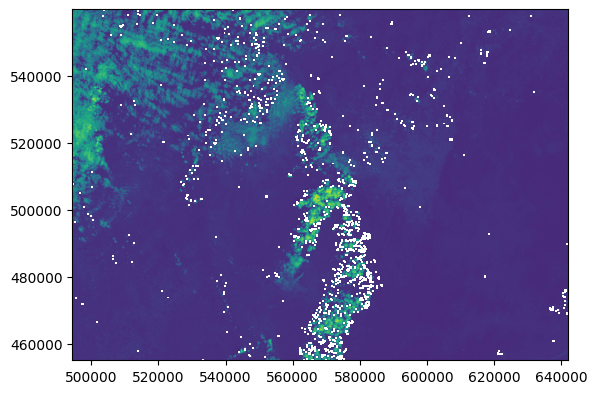

<Axes: >

In [16]:
imagen_satelital = rasterio.open(directorio_imagen_satelital)
show(imagen_satelital)

In [17]:
with rasterio.open(directorio_imagen_satelital) as imagen_satelital:
    imagen_a_clasificar = imagen_satelital.read()
    
    metadata_original = imagen_satelital.profile

In [18]:
imagen_a_clasificar = imagen_a_clasificar.reshape((imagen_a_clasificar.shape[0], -1)).T
imagen_a_clasificar = scaler.transform(imagen_a_clasificar)

In [19]:
predicciones = modelo.predict(imagen_a_clasificar)
clases_predichas = lb.inverse_transform(predicciones)

536319/536319 [==============================] - 317s 591us/step


In [20]:
imagen_clasificada_dl = clases_predichas.reshape((metadata_original['height'], metadata_original['width']))

In [21]:
directorio_imagen_satelital_clasificada_dl = r'C:\Users\jsuarez\Downloads\ImagenesDeepLearning\imagen_clasificada_dl.tif'

In [22]:
metadata_original.update(count = 1, dtype = rasterio.int32)

In [24]:
with rasterio.open(directorio_imagen_satelital_clasificada_dl, 'w', **metadata_original) as imagen_satelital:
    imagen_satelital.write(imagen_clasificada_dl.astype(rasterio.int32), 1)

In [25]:
with rasterio.open(directorio_imagen_satelital_clasificada_dl) as imagen_clasificada_dl:
    imagen_dl = imagen_clasificada_dl.read(1)

In [26]:
colores = ['orange', 'gray', 'blue']
rampa_de_colores = mcolors.ListedColormap(colores)

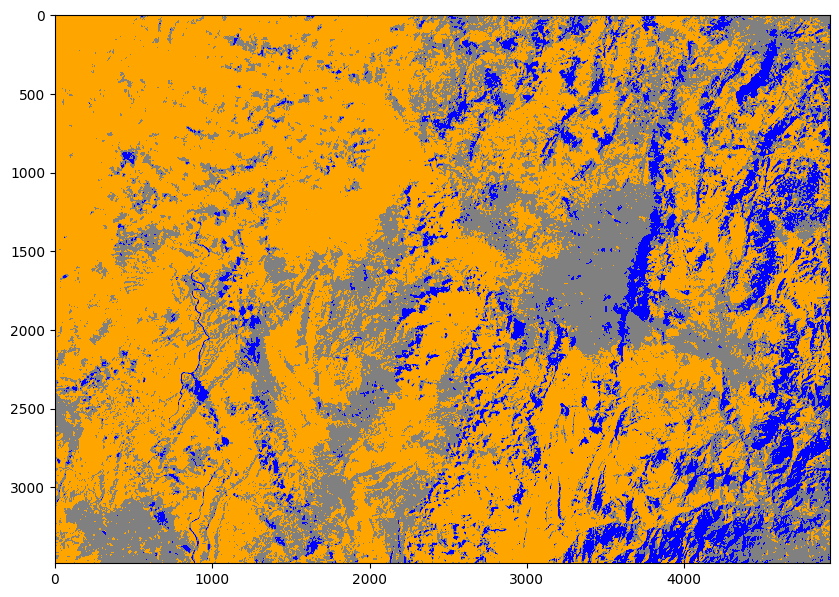

In [27]:
fig, ax = plt.subplots(figsize = (10, 10))
img = ax.imshow(imagen_dl, cmap = rampa_de_colores)